# 2022 빅콘테스트_spec+loan
## 우 걱정마세요

# 1. 라이브러리 및 패키지 불러오기

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn.preprocessing import LabelEncoder

# 2. join(user_spec,loan_result)


In [3]:
respec = pd.read_csv('/Users/sungahwang/Desktop/BC_data/respec_final.csv')

In [4]:
loan_result = pd.read_csv('/Users/sungahwang/Desktop/BC_data/loan_result.csv')

In [5]:
loan_train = loan_result[loan_result['is_applied']==1]

In [6]:
loan_target = loan_result[loan_result['is_applied'] != 1]

In [7]:
loan_target.isnull().sum()

application_id                 0
loanapply_insert_time          0
bank_id                        0
product_id                     0
loan_limit                  1757
loan_rate                   1757
is_applied               3257239
dtype: int64

In [8]:
loan_target = loan_target.dropna(subset = ['loan_limit', 'loan_rate'])

In [9]:
loan = pd.concat([loan_target,loan_train])

In [10]:
join = pd.merge(respec,loan,on="application_id",how="right")

In [11]:
join.isnull().sum()

application_id                               0
user_id                                    113
gender                                     113
insert_time                                113
yearly_income                              113
income_type                                113
employment_type                            113
houseown_type                              113
desired_amount                             113
purpose                                    113
personal_rehabilitation_yn                 113
personal_rehabilitation_complete_yn        113
existing_loan_cnt                          113
existing_loan_amt                          113
reage                                      113
career                                     113
credit_grade                               113
spec_clust                                 113
loanapply_insert_time                        0
bank_id                                      0
product_id                                   0
loan_limit   

In [12]:
sample = join[join['user_id'].isnull()]
sample['is_applied'].value_counts()

1.0    113
Name: is_applied, dtype: int64

In [13]:
join = join.dropna(subset = ['gender'])

In [14]:
join.isnull().sum()

application_id                               0
user_id                                      0
gender                                       0
insert_time                                  0
yearly_income                                0
income_type                                  0
employment_type                              0
houseown_type                                0
desired_amount                               0
purpose                                      0
personal_rehabilitation_yn                   0
personal_rehabilitation_complete_yn          0
existing_loan_cnt                            0
existing_loan_amt                            0
reage                                        0
career                                       0
credit_grade                                 0
spec_clust                                   0
loanapply_insert_time                        0
bank_id                                      0
product_id                                   0
loan_limit   

# 3. 전처리

In [15]:
COLORS = sns.color_palette()

def plot_bar(df, xlabel, ylabel, title, color=COLORS[0], figsize=(20, 10), rotation=45):
    plot = df.plot(kind='bar', color=color, figsize=figsize)
    plot.set_xlabel(xlabel, fontsize=11)
    plot.set_ylabel(ylabel, fontsize=11)
    plot.set_title(title, fontsize=13)
    plot.set_xticklabels(labels=df.index, rotation=rotation)

## 1) loanapply_insert_time

In [16]:
join.describe()

,application_id,user_id,gender,yearly_income,desired_amount,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,reage,career,credit_grade,spec_clust,bank_id,product_id,loan_limit,loan_rate,is_applied
count,1.352549e+07,1.352549e+07,1.352549e+07,1.352549e+07,1.352549e+07,1.352549e+07,1.352549e+07,1.352549e+07,1.352549e+07,1.352549e+07,1.352549e+07,1.352549e+07,1.352549e+07,1.352549e+07,1.352549e+07,1.351987e+07,1.351987e+07,1.027001e+07
mean,1.083521e+06,4.406067e+05,6.873794e-01,4.805831e+07,5.187427e+07,4.120407e-01,7.069717e-01,2.897422e+00,6.200471e+07,3.574351e+01,5.296572e+00,4.669750e+00,2.191600e+00,3.260073e+01,1.464135e+02,2.274095e+07,1.275172e+01,5.456041e-02
std,6.260521e+05,2.538066e+05,4.635612e-01,1.335765e+08,2.317256e+08,4.922024e-01,4.551513e-01,3.159879e+00,8.938416e+07,1.027684e+01,5.386949e+00,1.852053e+00,6.139699e-01,1.725627e+01,7.865894e+01,7.221901e+07,3.843386e+00,2.271202e-01
min,1.000000e+00,9.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.500000e+00,0.000000e+00
25%,5.415640e+05,2.212370e+05,0.000000e+00,2.900000e+07,1.000000e+07,0.000000e+00,0.000000e+00,1.000000e+00,8.000000e+06,3.000000e+01,2.000000e+00,3.000000e+00,2.000000e+00,1.900000e+01,7.100000e+01,9.000000e+06,9.600000e+00,0.000000e+00
50%,1.083963e+06,4.409350e+05,1.000000e+00,3.600000e+07,2.800000e+07,0.000000e+00,1.000000e+00,2.000000e+00,4.000000e+07,3.000000e+01,3.000000e+00,5.000000e+00,2.000000e+00,3.400000e+01,1.500000e+02,1.800000e+07,1.320000e+01,0.000000e+00
75%,1.625316e+06,6.612410e+05,1.000000e+00,5.000000e+07,5.000000e+07,1.000000e+00,1.000000e+00,4.000000e+00,7.000000e+07,4.000000e+01,6.000000e+00,6.000000e+00,2.000000e+00,4.600000e+01,2.170000e+02,3.300000e+07,1.560000e+01,0.000000e+00
max,2.167826e+06,8.796970e+05,1.000000e+00,1.000000e+10,1.000000e+10,1.000000e+00,1.000000e+00,2.290000e+02,7.512000e+09,7.000000e+01,1.230000e+02,1.000000e+01,4.000000e+00,6.400000e+01,2.700000e+02,2.308000e+11,2.000000e+01,1.000000e+00


In [17]:
#DateTime으로 인덱스 변경
join['loanapply_insert_time'] = pd.to_datetime(join['loanapply_insert_time'])

In [18]:
sample1 = join[join['is_applied'] == 1]
sample1 = sample1.set_index(keys=['loanapply_insert_time'],inplace=False, drop=False)
sample1 = sample1.astype({'is_applied':int})

In [19]:
# 대출 수를 하루 단위 구한다.
sample1 = sample1.resample('D').is_applied.count()
sample2 = pd.DataFrame(sample1)
sample2 = sample2.reset_index()

In [20]:
sample2 = sample2.rename({'is_applied':'yes'}, axis = 1)

In [21]:
sample2 = sample2.rename({'loanapply_insert_time':'Daytime'}, axis = 1)

In [22]:
sample2

,Daytime,yes
0,2022-03-01,4489
1,2022-03-02,8023
2,2022-03-03,6570
3,2022-03-04,5986
4,2022-03-05,2501
...,...,...
87,2022-05-27,7442
88,2022-05-28,3143
89,2022-05-29,3042
90,2022-05-30,7662


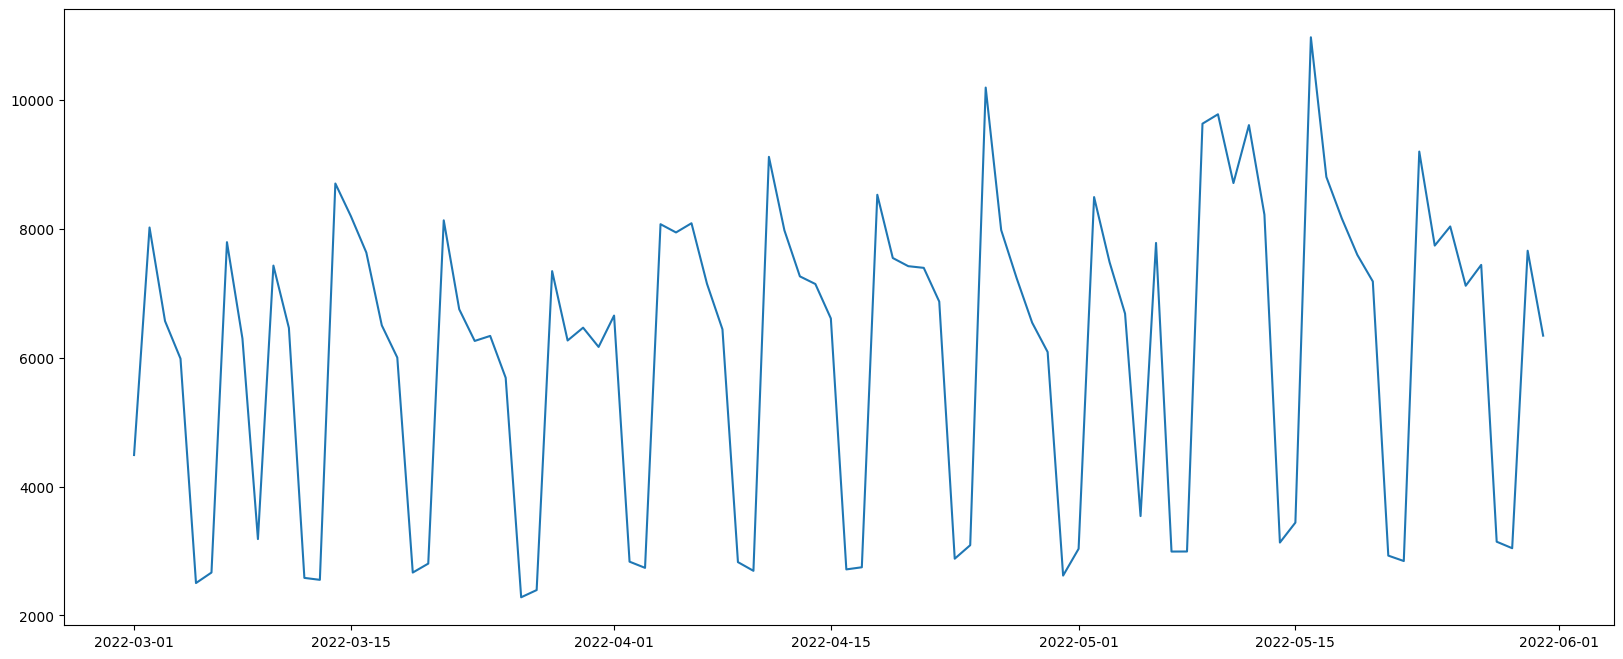

In [23]:
#시각화
sample2_x = sample2['Daytime']
sample2_y = sample2['yes']

plt.figure(figsize=(20,8))
plt.plot(sample2_x, sample2_y)
plt.show()

In [24]:
sample2 = sample2.astype({'yes':float})

In [25]:
#구간별 이동평균
sample2['line'] = sample2['yes'].rolling(window=15).mean()

<AxesSubplot:>

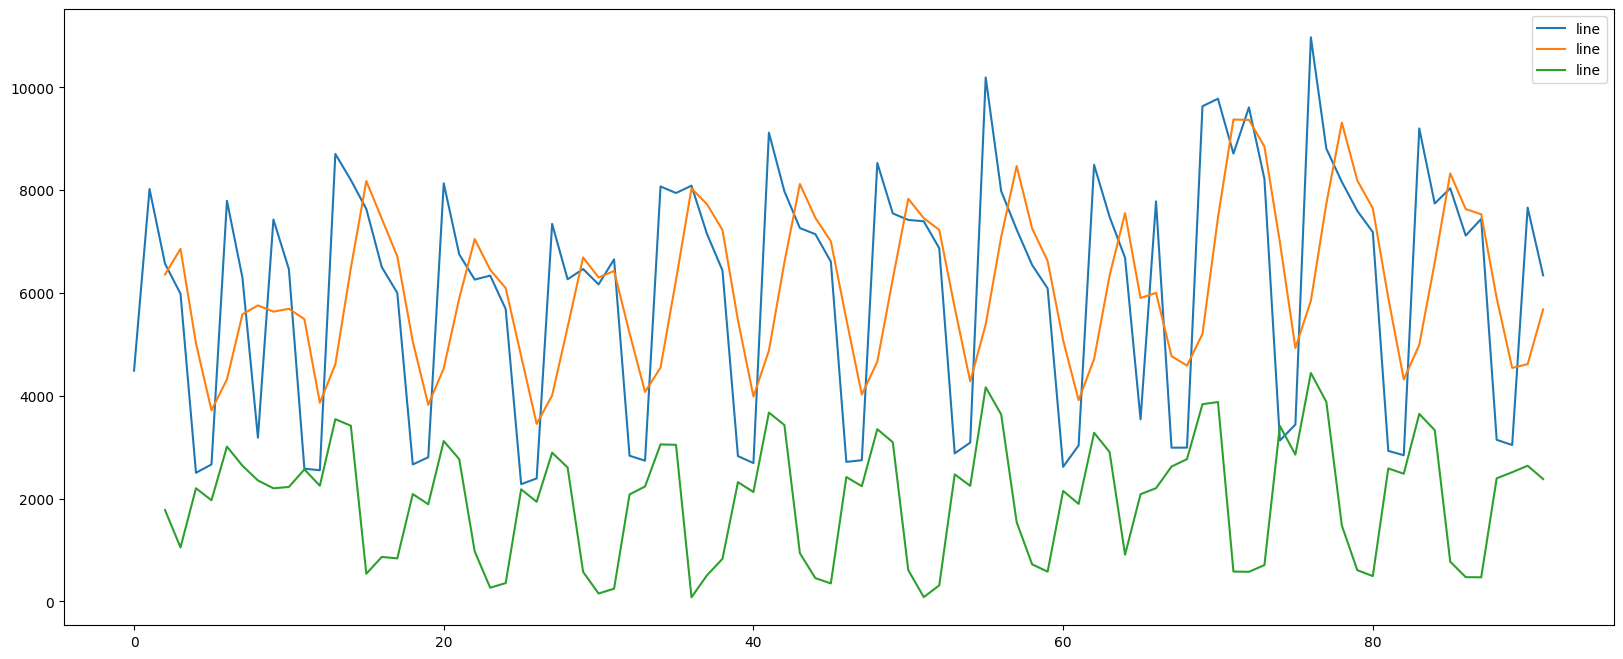

In [26]:
plt.figure(figsize=(20,8))
sample2['yes'].plot(label='line', legend=True)
sample2['yes'].rolling(3).mean().plot(legend=True, label='line')
sample2['yes'].rolling(3).std().plot(legend=True, label='line')

In [27]:
sample2['dayofweek'] = sample2['Daytime'].dt.dayofweek

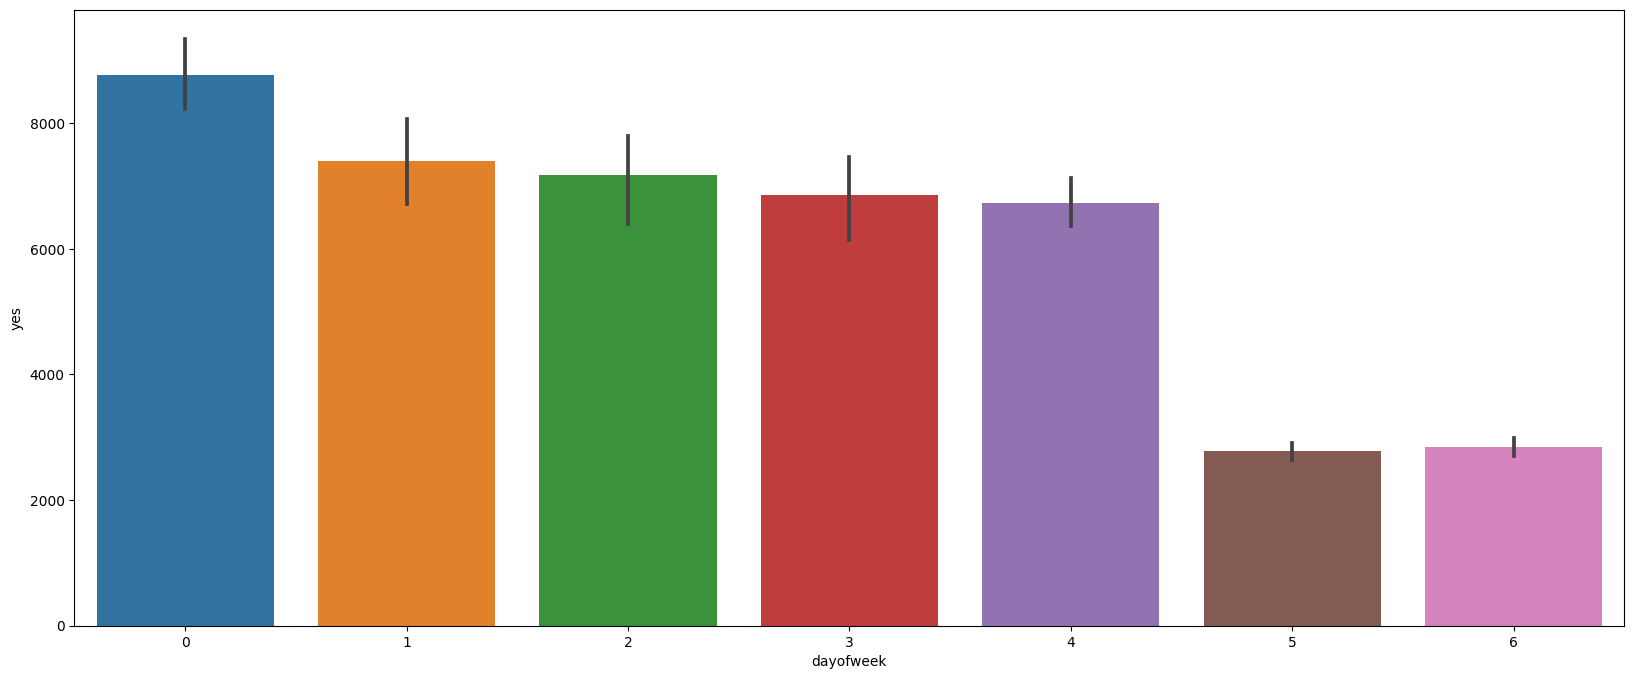

In [28]:
plt.figure(figsize=(20,8))
sns.barplot(x="dayofweek", y="yes", data=sample2)
plt.show()

## 2) 요일 추가

In [29]:
# 요일별 대출 확인
# 0:월 ~
join_dow = join.set_index('loanapply_insert_time').groupby(lambda date:date.dayofweek).sum()['is_applied']
join_dow

loanapply_insert_time
0    113872.0
1    103623.0
2     93179.0
3     89116.0
4     87440.0
5     36084.0
6     37022.0
Name: is_applied, dtype: float64

In [30]:
join['weekday'] = join['loanapply_insert_time'].dt.weekday

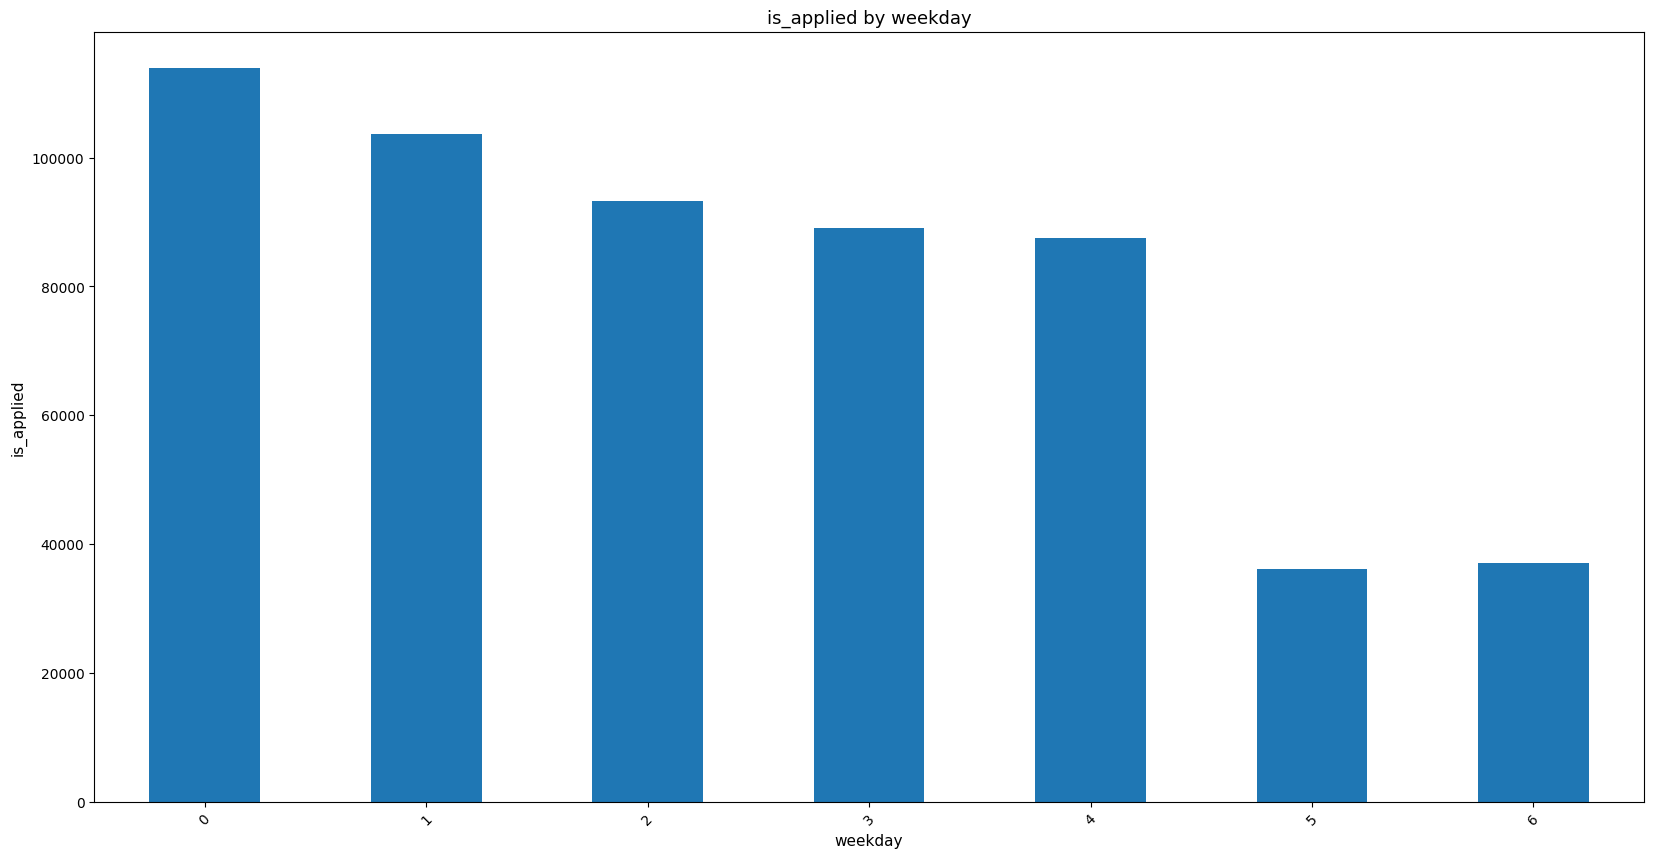

In [31]:
plot_bar(join_dow, 'weekday', 'is_applied', 'is_applied by weekday')

# 3) 시간대 추가

In [32]:
join['loanapply_insert_time'] = pd.to_datetime(join['loanapply_insert_time'])

In [33]:
join['loanapply_insert_hour'] = join['loanapply_insert_time'].dt.hour

In [34]:
join['loanapply_insert_hour'].unique()

array([13, 12, 21, 19,  5,  8, 16, 17, 20,  9, 14, 23, 10, 22, 18, 11, 15,
        7,  2,  1,  3,  0,  6,  4])

# 4) 은행별 대출 신청률 추가

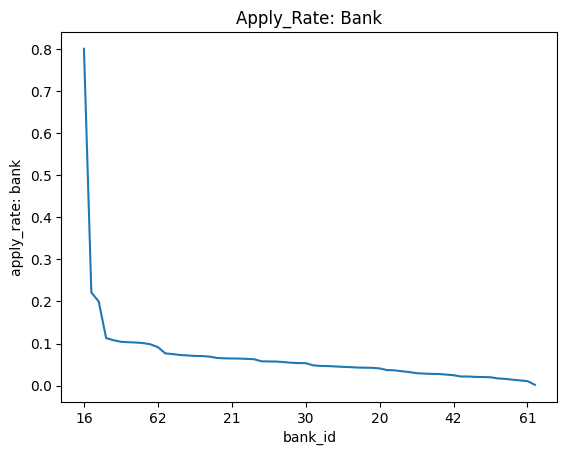

In [35]:
join['bank_id'] = join['bank_id'].astype('str')
join.groupby('bank_id')['is_applied'].mean().sort_values(ascending = False).plot()
plt.title('Apply_Rate: Bank')
plt.xlabel('bank_id')
plt.ylabel('apply_rate: bank')
plt.show()

In [36]:
train = join[join.is_applied.notnull()]
train

,application_id,user_id,gender,insert_time,yearly_income,income_type,employment_type,houseown_type,desired_amount,purpose,...,credit_grade,spec_clust,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,weekday,loanapply_insert_hour
13276,576643,545882.0,1.0,2022-05-09 10:54:51,72000000.0,직장가입자(4대보험O),정규직,전월세,20000000.0,생활비,...,7.0,2.0,2022-05-09 10:54:53,54,235,11000000.0,16.5,0.0,0,10
13277,576643,545882.0,1.0,2022-05-09 10:54:51,72000000.0,직장가입자(4대보험O),정규직,전월세,20000000.0,생활비,...,7.0,2.0,2022-05-09 10:54:53,11,118,3000000.0,20.0,0.0,0,10
13278,2136706,558819.0,1.0,2022-05-09 10:41:05,39000000.0,직장가입자(4대보험O),정규직,전월세,80000000.0,대환대출,...,5.0,2.0,2022-05-09 10:41:06,42,216,10000000.0,13.5,0.0,0,10
13279,2136706,558819.0,1.0,2022-05-09 10:41:05,39000000.0,직장가입자(4대보험O),정규직,전월세,80000000.0,대환대출,...,5.0,2.0,2022-05-09 10:41:07,25,169,22000000.0,15.9,0.0,0,10
13280,2136706,558819.0,1.0,2022-05-09 10:41:05,39000000.0,직장가입자(4대보험O),정규직,전월세,80000000.0,대환대출,...,5.0,2.0,2022-05-09 10:41:07,22,221,10000000.0,18.4,0.0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13525601,763676,318515.0,1.0,2022-05-16 13:39:37,130000000.0,직장가입자(4대보험O),정규직,전월세,100000000.0,전월세보증금,...,3.0,2.0,2022-05-16 13:39:39,60,183,60000000.0,5.2,1.0,0,13
13525602,327877,772173.0,1.0,2022-05-16 14:08:36,64000000.0,직장가입자(4대보험O),정규직,기타가족소유,20000000.0,대환대출,...,6.0,2.0,2022-05-16 14:08:39,2,7,30000000.0,11.8,1.0,0,14
13525603,190135,879596.0,1.0,2022-05-16 07:52:12,58000000.0,직장가입자(4대보험O),정규직,기타가족소유,3000000.0,생활비,...,7.0,2.0,2022-05-16 07:52:13,59,150,9000000.0,17.7,1.0,0,7
13525604,1369315,601384.0,0.0,2022-05-16 06:40:23,35000000.0,직장가입자(4대보험X),기타,자가,6000000.0,생활비,...,7.0,2.0,2022-05-16 06:40:45,49,136,18000000.0,6.5,1.0,0,6


In [37]:
bank_apply_rate = pd.DataFrame(train.groupby('bank_id')['is_applied'].mean().sort_values())
bank_apply_rate

,is_applied
bank_id,
28,0.001962
61,0.010598
46,0.012281
12,0.014004
55,0.016036
...,...
49,0.107746
60,0.112861
4,0.199582


In [38]:
bank_apply_rate = bank_apply_rate.rename(columns={'is_applied' : 'bank_apply_rate'})
bank_apply_rate

,bank_apply_rate
bank_id,
28,0.001962
61,0.010598
46,0.012281
12,0.014004
55,0.016036
...,...
49,0.107746
60,0.112861
4,0.199582


In [39]:
join = pd.merge(join, bank_apply_rate, left_on = 'bank_id', right_on = 'bank_id', how = 'left')
join

,application_id,user_id,gender,insert_time,yearly_income,income_type,employment_type,houseown_type,desired_amount,purpose,...,spec_clust,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,weekday,loanapply_insert_hour,bank_apply_rate
0,1748340,430982.0,1.0,2022-06-07 13:05:39,24000000.0,직장가입자(4대보험O),정규직,자가,25000000.0,대환대출,...,2.0,2022-06-07 13:05:41,7,191,42000000.0,13.6,NaN,1,13,0.103032
1,1748340,430982.0,1.0,2022-06-07 13:05:39,24000000.0,직장가입자(4대보험O),정규직,자가,25000000.0,대환대출,...,2.0,2022-06-07 13:05:41,25,169,24000000.0,17.9,NaN,1,13,0.021634
2,1748340,430982.0,1.0,2022-06-07 13:05:39,24000000.0,직장가입자(4대보험O),정규직,자가,25000000.0,대환대출,...,2.0,2022-06-07 13:05:41,2,7,24000000.0,18.5,NaN,1,13,0.098055
3,1748340,430982.0,1.0,2022-06-07 13:05:39,24000000.0,직장가입자(4대보험O),정규직,자가,25000000.0,대환대출,...,2.0,2022-06-07 13:05:41,4,268,29000000.0,10.8,NaN,1,13,0.199582
4,1748340,430982.0,1.0,2022-06-07 13:05:39,24000000.0,직장가입자(4대보험O),정규직,자가,25000000.0,대환대출,...,2.0,2022-06-07 13:05:41,11,118,5000000.0,16.4,NaN,1,13,0.017018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13525488,763676,318515.0,1.0,2022-05-16 13:39:37,130000000.0,직장가입자(4대보험O),정규직,전월세,100000000.0,전월세보증금,...,2.0,2022-05-16 13:39:39,60,183,60000000.0,5.2,1.0,0,13,0.112861
13525489,327877,772173.0,1.0,2022-05-16 14:08:36,64000000.0,직장가입자(4대보험O),정규직,기타가족소유,20000000.0,대환대출,...,2.0,2022-05-16 14:08:39,2,7,30000000.0,11.8,1.0,0,14,0.098055
13525490,190135,879596.0,1.0,2022-05-16 07:52:12,58000000.0,직장가입자(4대보험O),정규직,기타가족소유,3000000.0,생활비,...,2.0,2022-05-16 07:52:13,59,150,9000000.0,17.7,1.0,0,7,0.104059
13525491,1369315,601384.0,0.0,2022-05-16 06:40:23,35000000.0,직장가입자(4대보험X),기타,자가,6000000.0,생활비,...,2.0,2022-05-16 06:40:45,49,136,18000000.0,6.5,1.0,0,6,0.107746


# 5) 상품 별 대출 신청률 추가

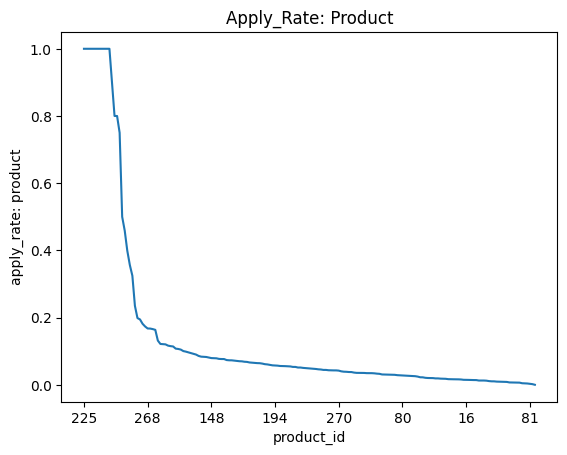

In [40]:
join['product_id'] = join['product_id'].astype(str)
join.groupby('product_id')['is_applied'].mean().sort_values(ascending = False).plot()
plt.title('Apply_Rate: Product')
plt.xlabel('product_id')
plt.ylabel('apply_rate: product')
plt.show()

In [41]:
train = join[join.is_applied.notnull()]
train

,application_id,user_id,gender,insert_time,yearly_income,income_type,employment_type,houseown_type,desired_amount,purpose,...,spec_clust,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,weekday,loanapply_insert_hour,bank_apply_rate
13276,576643,545882.0,1.0,2022-05-09 10:54:51,72000000.0,직장가입자(4대보험O),정규직,전월세,20000000.0,생활비,...,2.0,2022-05-09 10:54:53,54,235,11000000.0,16.5,0.0,0,10,0.042501
13277,576643,545882.0,1.0,2022-05-09 10:54:51,72000000.0,직장가입자(4대보험O),정규직,전월세,20000000.0,생활비,...,2.0,2022-05-09 10:54:53,11,118,3000000.0,20.0,0.0,0,10,0.017018
13278,2136706,558819.0,1.0,2022-05-09 10:41:05,39000000.0,직장가입자(4대보험O),정규직,전월세,80000000.0,대환대출,...,2.0,2022-05-09 10:41:06,42,216,10000000.0,13.5,0.0,0,10,0.024636
13279,2136706,558819.0,1.0,2022-05-09 10:41:05,39000000.0,직장가입자(4대보험O),정규직,전월세,80000000.0,대환대출,...,2.0,2022-05-09 10:41:07,25,169,22000000.0,15.9,0.0,0,10,0.021634
13280,2136706,558819.0,1.0,2022-05-09 10:41:05,39000000.0,직장가입자(4대보험O),정규직,전월세,80000000.0,대환대출,...,2.0,2022-05-09 10:41:07,22,221,10000000.0,18.4,0.0,0,10,0.027749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13525488,763676,318515.0,1.0,2022-05-16 13:39:37,130000000.0,직장가입자(4대보험O),정규직,전월세,100000000.0,전월세보증금,...,2.0,2022-05-16 13:39:39,60,183,60000000.0,5.2,1.0,0,13,0.112861
13525489,327877,772173.0,1.0,2022-05-16 14:08:36,64000000.0,직장가입자(4대보험O),정규직,기타가족소유,20000000.0,대환대출,...,2.0,2022-05-16 14:08:39,2,7,30000000.0,11.8,1.0,0,14,0.098055
13525490,190135,879596.0,1.0,2022-05-16 07:52:12,58000000.0,직장가입자(4대보험O),정규직,기타가족소유,3000000.0,생활비,...,2.0,2022-05-16 07:52:13,59,150,9000000.0,17.7,1.0,0,7,0.104059
13525491,1369315,601384.0,0.0,2022-05-16 06:40:23,35000000.0,직장가입자(4대보험X),기타,자가,6000000.0,생활비,...,2.0,2022-05-16 06:40:45,49,136,18000000.0,6.5,1.0,0,6,0.107746


In [42]:
product_apply_rate = pd.DataFrame(train.groupby('product_id')['is_applied'].mean().sort_values())
product_apply_rate

,is_applied
product_id,
211,0.000000
217,0.001962
81,0.002831
40,0.003859
139,0.004386
...,...
21,1.000000
225,1.000000
52,1.000000


In [43]:
product_apply_rate = product_apply_rate.rename(columns={'is_applied' : 'product_apply_rate'})

In [44]:
join = pd.merge(join, product_apply_rate, left_on = 'product_id', right_on = 'product_id', how = 'left')
join

,application_id,user_id,gender,insert_time,yearly_income,income_type,employment_type,houseown_type,desired_amount,purpose,...,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,weekday,loanapply_insert_hour,bank_apply_rate,product_apply_rate
0,1748340,430982.0,1.0,2022-06-07 13:05:39,24000000.0,직장가입자(4대보험O),정규직,자가,25000000.0,대환대출,...,2022-06-07 13:05:41,7,191,42000000.0,13.6,NaN,1,13,0.103032,0.114031
1,1748340,430982.0,1.0,2022-06-07 13:05:39,24000000.0,직장가입자(4대보험O),정규직,자가,25000000.0,대환대출,...,2022-06-07 13:05:41,25,169,24000000.0,17.9,NaN,1,13,0.021634,0.035367
2,1748340,430982.0,1.0,2022-06-07 13:05:39,24000000.0,직장가입자(4대보험O),정규직,자가,25000000.0,대환대출,...,2022-06-07 13:05:41,2,7,24000000.0,18.5,NaN,1,13,0.098055,0.093935
3,1748340,430982.0,1.0,2022-06-07 13:05:39,24000000.0,직장가입자(4대보험O),정규직,자가,25000000.0,대환대출,...,2022-06-07 13:05:41,4,268,29000000.0,10.8,NaN,1,13,0.199582,0.167558
4,1748340,430982.0,1.0,2022-06-07 13:05:39,24000000.0,직장가입자(4대보험O),정규직,자가,25000000.0,대환대출,...,2022-06-07 13:05:41,11,118,5000000.0,16.4,NaN,1,13,0.017018,0.016149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13525488,763676,318515.0,1.0,2022-05-16 13:39:37,130000000.0,직장가입자(4대보험O),정규직,전월세,100000000.0,전월세보증금,...,2022-05-16 13:39:39,60,183,60000000.0,5.2,1.0,0,13,0.112861,0.120308
13525489,327877,772173.0,1.0,2022-05-16 14:08:36,64000000.0,직장가입자(4대보험O),정규직,기타가족소유,20000000.0,대환대출,...,2022-05-16 14:08:39,2,7,30000000.0,11.8,1.0,0,14,0.098055,0.093935
13525490,190135,879596.0,1.0,2022-05-16 07:52:12,58000000.0,직장가입자(4대보험O),정규직,기타가족소유,3000000.0,생활비,...,2022-05-16 07:52:13,59,150,9000000.0,17.7,1.0,0,7,0.104059,0.051364
13525491,1369315,601384.0,0.0,2022-05-16 06:40:23,35000000.0,직장가입자(4대보험X),기타,자가,6000000.0,생활비,...,2022-05-16 06:40:45,49,136,18000000.0,6.5,1.0,0,6,0.107746,0.234971


In [45]:
join.isnull().sum()

application_id                               0
user_id                                      0
gender                                       0
insert_time                                  0
yearly_income                                0
income_type                                  0
employment_type                              0
houseown_type                                0
desired_amount                               0
purpose                                      0
personal_rehabilitation_yn                   0
personal_rehabilitation_complete_yn          0
existing_loan_cnt                            0
existing_loan_amt                            0
reage                                        0
career                                       0
credit_grade                                 0
spec_clust                                   0
loanapply_insert_time                        0
bank_id                                      0
product_id                                   0
loan_limit   

# 6) 결측값 처리

In [46]:
clust = join[['spec_clust', 'bank_id', 'product_id']]
clust.head(3)

,spec_clust,bank_id,product_id
0,2.0,7,191
1,2.0,25,169
2,2.0,2,7


In [47]:
clust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13525493 entries, 0 to 13525492
Data columns (total 3 columns):
 #   Column      Dtype  
---  ------      -----  
 0   spec_clust  float64
 1   bank_id     object 
 2   product_id  object 
dtypes: float64(1), object(2)
memory usage: 412.8+ MB


In [48]:
clust['spec_clust'] = clust['spec_clust'].astype('str')

/var/folders/8s/_473l8ss1hx20zy1txdh03x40000gn/T/ipykernel_97852/2728138816.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clust['spec_clust'] = clust['spec_clust'].astype('str')


In [49]:
clust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13525493 entries, 0 to 13525492
Data columns (total 3 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   spec_clust  object
 1   bank_id     object
 2   product_id  object
dtypes: object(3)
memory usage: 412.8+ MB


In [50]:
from kmodes.kmodes import KModes

In [51]:
kmode = KModes(n_clusters=6, init = "random", n_init = 5, verbose=1)
kmode.fit_predict(clust)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 605012, cost: 23677809.0
Run 1, iteration: 2/100, moves: 7532, cost: 23677809.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 175414, cost: 23654479.0
Run 2, iteration: 2/100, moves: 1380, cost: 23654479.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 25261646.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 25054260.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 532945, cost: 23525604.0
Run 5, iteration: 2/100, moves: 837, cost: 23525604.0
Best run was number 5


array([0, 0, 0, ..., 0, 0, 0], dtype=uint16)

In [52]:
labels  = kmode.labels_

In [53]:
join['cluster2'] = labels

In [54]:
group = join.groupby(['cluster2'])['loan_limit'].mean()
group

cluster2
0    2.348538e+07
1    2.138277e+07
2    2.416165e+07
3    2.092328e+07
4    1.317003e+07
5    1.838435e+07
Name: loan_limit, dtype: float64

In [55]:
join.loc[(join['loan_limit'].isnull()) & (join['cluster2'] == 0),'loan_limit'] = group[0]
join.loc[(join['loan_limit'].isnull()) & (join['cluster2'] == 1),'loan_limit'] = group[1]
join.loc[(join['loan_limit'].isnull()) & (join['cluster2'] == 2),'loan_limit'] = group[2]
join.loc[(join['loan_limit'].isnull()) & (join['cluster2'] == 3),'loan_limit'] = group[3]
join.loc[(join['loan_limit'].isnull()) & (join['cluster2'] == 4),'loan_limit'] = group[4]
join.loc[(join['loan_limit'].isnull()) & (join['cluster2'] == 5),'loan_limit'] = group[5]

In [56]:
group2 = join.groupby(['cluster2'])['loan_rate'].mean()
group2

cluster2
0    12.839079
1    12.264228
2    12.668821
3    11.382797
4    14.159533
5    12.433974
Name: loan_rate, dtype: float64

In [57]:
join.loc[(join['loan_rate'].isnull()) & (join['cluster2'] == 0),'loan_rate'] = group2[0]
join.loc[(join['loan_rate'].isnull()) & (join['cluster2'] == 1),'loan_rate'] = group2[1]
join.loc[(join['loan_rate'].isnull()) & (join['cluster2'] == 2),'loan_rate'] = group2[2]
join.loc[(join['loan_rate'].isnull()) & (join['cluster2'] == 3),'loan_rate'] = group2[3]
join.loc[(join['loan_rate'].isnull()) & (join['cluster2'] == 4),'loan_rate'] = group2[4]
join.loc[(join['loan_rate'].isnull()) & (join['cluster2'] == 5),'loan_rate'] = group2[5]

In [58]:
group3 = join.groupby(['cluster2'])['bank_apply_rate'].mean()
group3

cluster2
0    0.056598
1    0.050078
2    0.063549
3    0.042242
4    0.027749
5    0.048257
Name: bank_apply_rate, dtype: float64

In [59]:
join.loc[(join['bank_apply_rate'].isnull()) & (join['cluster2'] == 0),'bank_apply_rate'] = group3[0]
join.loc[(join['bank_apply_rate'].isnull()) & (join['cluster2'] == 1),'bank_apply_rate'] = group3[1]
join.loc[(join['bank_apply_rate'].isnull()) & (join['cluster2'] == 2),'bank_apply_rate'] = group3[2]
join.loc[(join['bank_apply_rate'].isnull()) & (join['cluster2'] == 3),'bank_apply_rate'] = group3[3]
join.loc[(join['bank_apply_rate'].isnull()) & (join['cluster2'] == 4),'bank_apply_rate'] = group3[4]
join.loc[(join['bank_apply_rate'].isnull()) & (join['cluster2'] == 5),'bank_apply_rate'] = group3[5]

In [60]:
group4 = join.groupby(['cluster2'])['product_apply_rate'].mean()
group4

cluster2
0    0.056954
1    0.048045
2    0.063167
3    0.041961
4    0.028143
5    0.049347
Name: product_apply_rate, dtype: float64

In [61]:
join.loc[(join['product_apply_rate'].isnull()) & (join['cluster2'] == 0),'product_apply_rate'] = group4[0]
join.loc[(join['product_apply_rate'].isnull()) & (join['cluster2'] == 1),'product_apply_rate'] = group4[1]
join.loc[(join['product_apply_rate'].isnull()) & (join['cluster2'] == 2),'product_apply_rate'] = group4[2]
join.loc[(join['product_apply_rate'].isnull()) & (join['cluster2'] == 3),'product_apply_rate'] = group4[3]
join.loc[(join['product_apply_rate'].isnull()) & (join['cluster2'] == 4),'product_apply_rate'] = group4[4]
join.loc[(join['product_apply_rate'].isnull()) & (join['cluster2'] == 5),'product_apply_rate'] = group4[5]

In [62]:
join.isnull().sum()

application_id                               0
user_id                                      0
gender                                       0
insert_time                                  0
yearly_income                                0
income_type                                  0
employment_type                              0
houseown_type                                0
desired_amount                               0
purpose                                      0
personal_rehabilitation_yn                   0
personal_rehabilitation_complete_yn          0
existing_loan_cnt                            0
existing_loan_amt                            0
reage                                        0
career                                       0
credit_grade                                 0
spec_clust                                   0
loanapply_insert_time                        0
bank_id                                      0
product_id                                   0
loan_limit   

In [63]:
join.to_csv('/Users/sungahwang/Desktop/BC_data/Preprocessing+loan.csv', index = False)